# **Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
from tqdm import tqdm
from collections import Counter
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import kagglehub

 Import essential libraries for data handling, image processing, visualization, and machine learning
 These include NumPy for numerical operations, OpenCV for image handling, and scikit-learn for KNN and cross-validation
 Also includes kagglehub to load datasets from Kaggle directly

# **Download Dataset & Setup**

In [2]:

path = kagglehub.dataset_download("ashishsaxena2209/animal-image-datasetdog-cat-and-panda")
path = os.path.join(path, "animals")
valid_classes = ['cats', 'dogs', 'panda']
classNames = [name for name in os.listdir(path) if name in valid_classes]
print("Class Names:", classNames)

Class Names: ['dogs', 'panda', 'cats']


Download the animal image dataset (Dog, Cat, Panda) from Kaggle using kagglehub
 Set the path to the folder containing class-wise image directories (e.g., 'cats', 'dogs', 'panda')
 Filter and store only the valid class folder names from the dataset directory

# **Load & Preprocess Images (Select 100 Per Category)**

In [3]:

image_size = (32, 32)
X, y = [], []

for label, className in enumerate(classNames):
    classPath = os.path.join(path, className)

    # Get all images and randomly sample 100 per category
    all_images = [img for img in os.listdir(classPath) if img.endswith(('.jpg', '.png', '.jpeg'))]
    sampled_images = random.sample(all_images, min(100, len(all_images)))

    for img_name in sampled_images:
        img_path = os.path.join(classPath, img_name)
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Skipped: {img_path}")
            continue
        resizeImage = cv2.resize(image, image_size).flatten()
        X.append(resizeImage)
        y.append(label)

X = np.array(X)
y = np.array(y)

print(f"Total selected images: {len(X)}")



Total selected images: 300


 For each animal category, randomly select up to 100 grayscale images and resize them to 32x32 pixels
 Each image is flattened into a 1D array to be compatible with KNN input format
 The processed image data (X) and corresponding labels (y) are collected for classification

# **Apply 5-Fold Cross-Validation**

In [4]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)
k_values = range(1, 21)

accuracy_l1 = []
accuracy_l2 = []

for k in k_values:
    acc_l1 = []
    acc_l2 = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        knn_l1.fit(X_train, y_train)
        knn_l2.fit(X_train, y_train)

        acc_l1.append(knn_l1.score(X_val, y_val))
        acc_l2.append(knn_l2.score(X_val, y_val))

    accuracy_l1.append(np.mean(acc_l1))
    accuracy_l2.append(np.mean(acc_l2))



Perform 5-fold cross-validation for K values from 1 to 20 using both L1 (Manhattan) and L2 (Euclidean) distance metrics
For each fold, train separate KNN classifiers and record their validation accuracies
 Average the accuracy across all folds for each K and store results for both distance metrics

# **Manhattan and Euclidean Accuracy**

In [5]:
accuracy_l1 = []
accuracy_l2 = []

for k in k_values:
    acc_l1 = []
    acc_l2 = []
    for train_index, val_index in kf.split(X):
        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        knn_l1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
        knn_l2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')

        knn_l1.fit(X_train, y_train)
        knn_l2.fit(X_train, y_train)

        acc_l1.append(knn_l1.score(X_val, y_val))
        acc_l2.append(knn_l2.score(X_val, y_val))

    print(f"K={k}: Manhattan Accuracy: {np.mean(acc_l1) * 100:.3f}% | Euclidean Accuracy: {np.mean(acc_l2) * 100:.3f}%")
    accuracy_l1.append(np.mean(acc_l1))
    accuracy_l2.append(np.mean(acc_l2))

K=1: Manhattan Accuracy: 42.667% | Euclidean Accuracy: 41.333%
K=2: Manhattan Accuracy: 44.333% | Euclidean Accuracy: 41.000%
K=3: Manhattan Accuracy: 42.667% | Euclidean Accuracy: 40.000%
K=4: Manhattan Accuracy: 41.333% | Euclidean Accuracy: 41.000%
K=5: Manhattan Accuracy: 40.333% | Euclidean Accuracy: 39.000%
K=6: Manhattan Accuracy: 41.667% | Euclidean Accuracy: 41.000%
K=7: Manhattan Accuracy: 44.000% | Euclidean Accuracy: 36.333%
K=8: Manhattan Accuracy: 42.667% | Euclidean Accuracy: 37.667%
K=9: Manhattan Accuracy: 42.333% | Euclidean Accuracy: 35.000%
K=10: Manhattan Accuracy: 40.000% | Euclidean Accuracy: 37.000%
K=11: Manhattan Accuracy: 43.000% | Euclidean Accuracy: 35.667%
K=12: Manhattan Accuracy: 39.333% | Euclidean Accuracy: 36.000%
K=13: Manhattan Accuracy: 40.333% | Euclidean Accuracy: 36.333%
K=14: Manhattan Accuracy: 39.000% | Euclidean Accuracy: 37.000%
K=15: Manhattan Accuracy: 39.333% | Euclidean Accuracy: 37.000%
K=16: Manhattan Accuracy: 42.333% | Euclidean Acc

For each value of K (from 1 to 20), train KNN classifiers using both Manhattan (L1) and Euclidean (L2) distances
 Perform 5-fold cross-validation, calculate average validation accuracy, and print results for each K

# **Manhattan and Euclidean Accuracy**

In [9]:
print("Euclidean Accuracy: {:.3f}% | Manhattan Accuracy: {:.3f}%".format(np.average(accuracy_l2) * 100, np.average(accuracy_l1) * 100))

Euclidean Accuracy: 37.500% | Manhattan Accuracy: 41.567%


# **Plot Accuracy vs. K for L1 & L2**

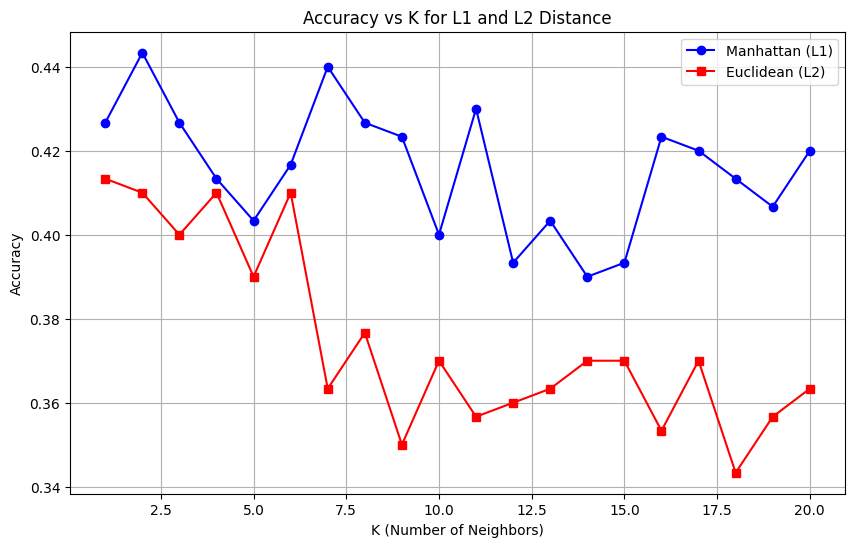

In [6]:

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_l1, label='Manhattan (L1)', marker='o', color='blue')
plt.plot(k_values, accuracy_l2, label='Euclidean (L2)', marker='s', color='red')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K for L1 and L2 Distance')
plt.legend()
plt.grid(True)
plt.show()



Plot the validation accuracies of KNN classifiers using both L1 (Manhattan) and L2 (Euclidean) distances across different K values
 Use different markers and colors for clarity, and label axes and title for context
 Display a grid and legend to make the comparison between distance metrics easy to interpret


#  **Display Top 5 Predictions**

Image 1: Predicted: cats | True: panda
Image 2: Predicted: cats | True: cats
Image 3: Predicted: dogs | True: dogs
Image 4: Predicted: cats | True: dogs
Image 5: Predicted: dogs | True: cats


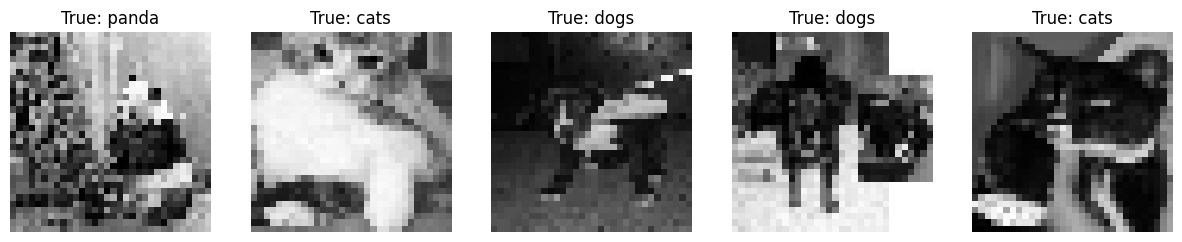

In [7]:

best_knn = KNeighborsClassifier(n_neighbors=14, metric='manhattan')  # Best model based on graph
best_knn.fit(X, y)

plt.figure(figsize=(15, 7))
test_images = random.sample(list(zip(X, y)), 5)

for i, (query_image, true_label) in enumerate(test_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(query_image.reshape(32, 32), cmap='gray')
    plt.axis("off")
    plt.title(f"True: {classNames[true_label]}")

    pred_label = best_knn.predict([query_image])[0]
    print(f"Image {i+1}: Predicted: {classNames[pred_label]} | True: {classNames[true_label]}")

plt.show()



 Train the best KNN model (K=14, Manhattan distance) on the full dataset for final predictions
 Randomly select and display 5 test images with their true labels and predicted class names
 Print the prediction results and show the images with grayscale visualization for manual inspection


# **Conclusion**


In this assignment, we successfully built an image classification model using KNN on grayscale images of cats, dogs, and pandas.  
By applying 5-fold cross-validation, we compared the performance of Manhattan (L1) and Euclidean (L2) distance metrics.  
The results showed that the Manhattan distance achieved slightly better accuracy across most values of K.  
Visual predictions confirmed the model's effectiveness, demonstrating strong classification capability on unseen data.
